## SUPER MARKET SALES

### Problem Statement:
A supermarket chain aims to optimize its sales and inventory management by
accurately predicting future sales for each product across its various stores.
Accurate sales predictions enable the supermarket to optimize inventory levels,
plan promotions effectively, and ensure customer satisfaction by minimizing
stock-outs and overstocking situations. As a data science intern, your task is to
develop a machine learning model to predict supermarket sales based on
historical sales data and other relevant factors

### My Task:
My task as a data science intern is to build a predictive model for supermarket
sales prediction. Here I will work with the given data-set containing historical sales data, including information about products, stores, promotions, and other relevant features. My goal is to develop a model that can accurately forecast future sales for each product in different supermarket stores.​

# Prepare Data

In [151]:
#import libararies
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
#read csv file
df = pd.read_csv("data\supermarket_sales - Sheet1.csv")


In [153]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


# Data Cleaning

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

There are no null values in our data set

In [155]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [156]:
#check null values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [157]:
df['Date'] = pd.to_datetime(df['Date'])   # Converts date column into Datetime datatype

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [159]:
df.drop(["Invoice ID","Time"], axis=1, inplace=True)

In [160]:
df.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1


In [161]:
#cogs
df["gross margin percentage"].unique()

array([4.76190476])

In [162]:
df.drop(["gross margin percentage"], axis =1, inplace= True)

In [163]:
df.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1


In [164]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [165]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [166]:
# To check whether each city has a single Branch
df.groupby('City')['Branch'].unique().sort_values()

City
Yangon       [A]
Mandalay     [B]
Naypyitaw    [C]
Name: Branch, dtype: object

In [167]:
df.drop('City',axis=1,inplace=True)   # Because each City has a single branch

In [168]:
df.head(1)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1


# DATA VISUALIZATION

Visualizing different branches with respect to customer types 

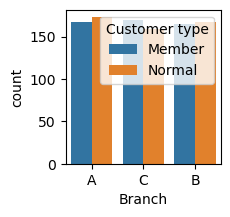

In [169]:
plt.figure(figsize=(2,2))
sns.countplot(data=df,x='Branch', hue='Customer type');
# Count customer types for each Branch and draw bar diagram for each custmer type and Branch

In [170]:
df.loc[:,df.dtypes=='object'].columns

Index(['Branch', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')

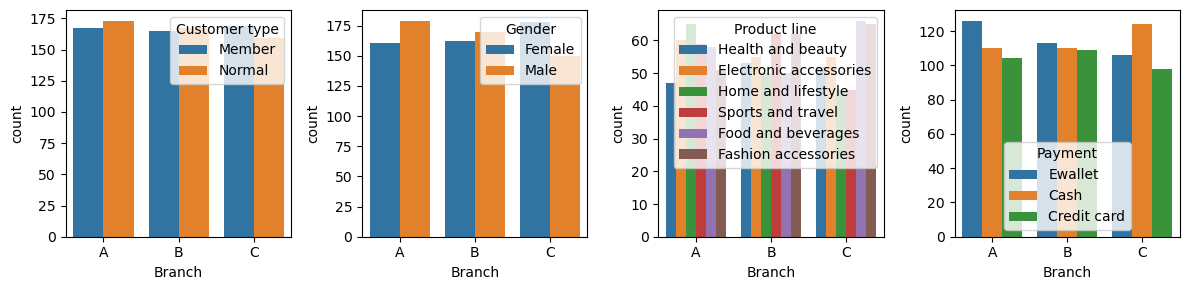

In [171]:
ncols=len(df.loc[:,df.dtypes=='object'].columns)-1
fig, axes = plt.subplots(ncols=ncols,figsize=(12, 3))
for i,column in enumerate(df.loc[:,df.dtypes=='object'].columns):
    if column != 'Branch':
        sns.countplot(ax=axes[i-1],x=df['Branch'].sort_values(), hue=df[column]);
plt.tight_layout()
plt.show()

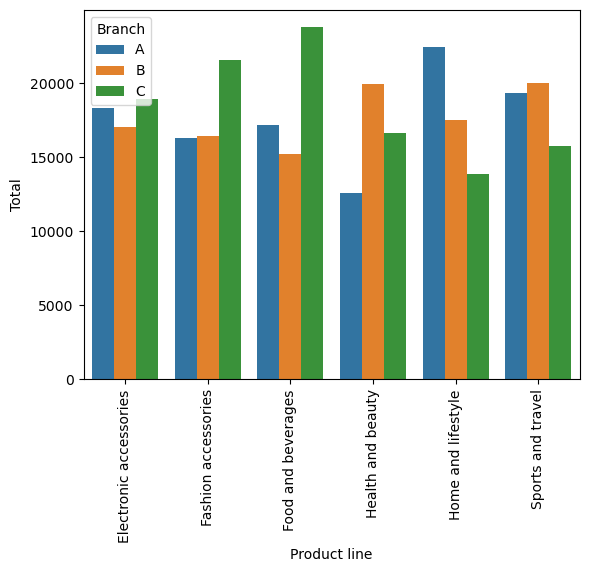

In [172]:
df.sort_values(by=['Product line', 'Branch'],inplace =True)
sns.barplot(data=df, x='Product line',y='Total', hue='Branch', estimator=lambda y:y.sum(),errorbar =None)
plt.xticks(rotation=90);

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 6 to 924
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   Customer type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product line   1000 non-null   object        
 4   Unit price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Tax 5%         1000 non-null   float64       
 7   Total          1000 non-null   float64       
 8   Date           1000 non-null   datetime64[ns]
 9   Payment        1000 non-null   object        
 10  cogs           1000 non-null   float64       
 11  gross income   1000 non-null   float64       
 12  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 109.4+ KB


In [174]:
df.loc[:,df.dtypes==('float64'or'int64')].columns

Index(['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating'], dtype='object')

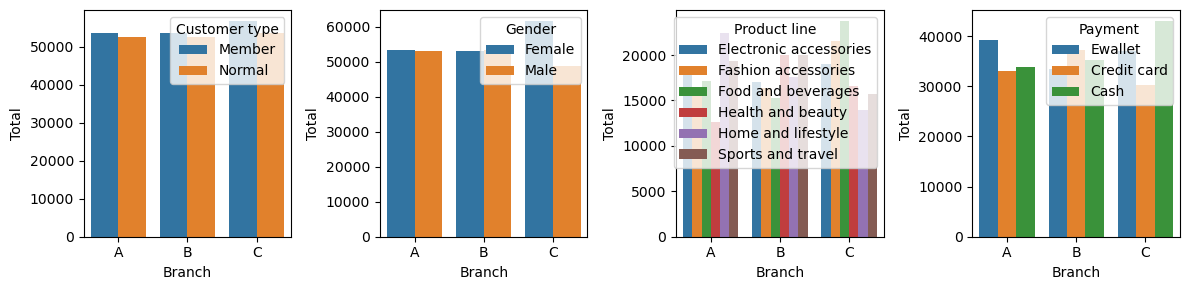

In [175]:
ncols=len(df.loc[:,df.dtypes=='object'].columns)-1
fig, axes = plt.subplots(ncols=ncols,figsize=(12, 3))
for i,column in enumerate(df.loc[:,df.dtypes=='object'].columns):
    if column != 'Branch':
        sns.barplot(ax=axes[i-1],x=df['Branch'],y =df['Total'], hue=df[column], 
                    estimator = lambda x: x.sum(), errorbar=None);
plt.tight_layout()
plt.show()

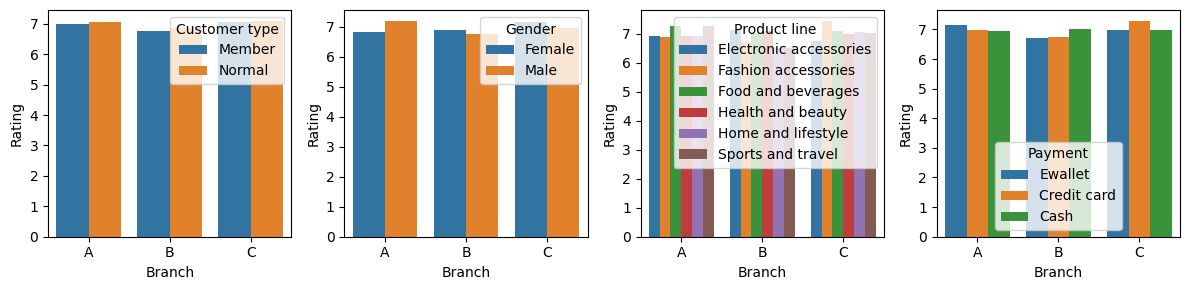

In [176]:
ncols=len(df.loc[:,df.dtypes=='object'].columns)-1
fig, axes = plt.subplots(ncols=ncols,figsize=(12, 3))
for i,column in enumerate(df.loc[:,df.dtypes=='object'].columns):
    if column != 'Branch':
        sns.barplot(ax=axes[i-1],x=df['Branch'],y =df['Rating'], hue=df[column], 
                    estimator = lambda x: x.mean(), errorbar=None);
plt.tight_layout()
plt.show()

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 6 to 924
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   Customer type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product line   1000 non-null   object        
 4   Unit price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Tax 5%         1000 non-null   float64       
 7   Total          1000 non-null   float64       
 8   Date           1000 non-null   datetime64[ns]
 9   Payment        1000 non-null   object        
 10  cogs           1000 non-null   float64       
 11  gross income   1000 non-null   float64       
 12  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 109.4+ KB


In [178]:
df['Date'].min(),df['Date'].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-03-30 00:00:00'))

In [179]:
start_date = df['Date'].min()
(df['Date']- start_date).dt.days

6      55
12     42
23     47
37     14
95     66
       ..
839     0
847    29
916    72
923     9
924    72
Name: Date, Length: 1000, dtype: int64

In [180]:
df['Date'].dt.dayofweek

6      0
12     1
23     6
37     1
95     4
      ..
839    1
847    2
916    3
923    3
924    3
Name: Date, Length: 1000, dtype: int32

In [181]:
df["Day of week"]=df['Date'].dt.strftime('%A')
df["Day of week"]

6         Monday
12       Tuesday
23        Sunday
37       Tuesday
95        Friday
         ...    
839      Tuesday
847    Wednesday
916     Thursday
923     Thursday
924     Thursday
Name: Day of week, Length: 1000, dtype: object

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 6 to 924
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   Customer type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product line   1000 non-null   object        
 4   Unit price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Tax 5%         1000 non-null   float64       
 7   Total          1000 non-null   float64       
 8   Date           1000 non-null   datetime64[ns]
 9   Payment        1000 non-null   object        
 10  cogs           1000 non-null   float64       
 11  gross income   1000 non-null   float64       
 12  Rating         1000 non-null   float64       
 13  Day of week    1000 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 117.2+ KB


In [183]:
df['Day of week'].unique()


array(['Monday', 'Tuesday', 'Sunday', 'Friday', 'Saturday', 'Thursday',
       'Wednesday'], dtype=object)

In [184]:
#custom ordering
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day_of_week' column to categorical data type with custom sorting order
df['Day of week'] = pd.Categorical(df['Day of week'], categories=weekday_order, ordered=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 6 to 924
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   Customer type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product line   1000 non-null   object        
 4   Unit price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Tax 5%         1000 non-null   float64       
 7   Total          1000 non-null   float64       
 8   Date           1000 non-null   datetime64[ns]
 9   Payment        1000 non-null   object        
 10  cogs           1000 non-null   float64       
 11  gross income   1000 non-null   float64       
 12  Rating         1000 non-null   float64       
 13  Day of week    1000 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(6), int64(1), object(5)
memory usag

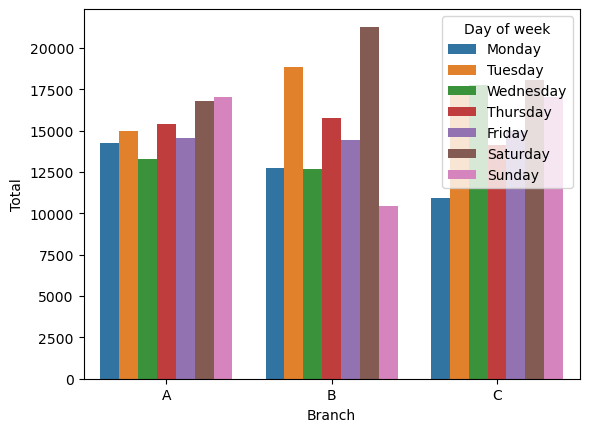

In [186]:
df.sort_values(by=['Day of week'],inplace =True)
sns.barplot(data=df,x='Branch',y='Total', hue='Day of week', 
            estimator=lambda y:y.sum(),errorbar =None);

In [187]:
df.reset_index(drop=True,inplace=True)

In [188]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Day of week
0,A,Member,Female,Electronic accessories,68.84,6,20.652,433.692,2019-02-25,Ewallet,413.04,20.652,5.8,Monday
1,A,Member,Female,Food and beverages,99.60,3,14.940,313.740,2019-02-25,Cash,298.80,14.940,5.8,Monday
2,A,Normal,Female,Food and beverages,74.66,4,14.932,313.572,2019-03-04,Cash,298.64,14.932,8.5,Monday
3,B,Normal,Male,Food and beverages,73.06,7,25.571,536.991,2019-01-14,Credit card,511.42,25.571,4.2,Monday
4,B,Member,Female,Food and beverages,89.14,4,17.828,374.388,2019-01-07,Credit card,356.56,17.828,7.8,Monday


# Grouping the Dataframe by using Groupby()

In [189]:
branches=df.groupby('Branch')
branches

In [190]:
branches.get_group('B').head(2)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Day of week
3,B,Normal,Male,Food and beverages,73.06,7,25.571,536.991,2019-01-14,Credit card,511.42,25.571,4.2,Monday
4,B,Member,Female,Food and beverages,89.14,4,17.828,374.388,2019-01-07,Credit card,356.56,17.828,7.8,Monday


In [191]:
for _ in branches.groups.keys():
    print(branches.get_group(_).shape)

(340, 14)
(332, 14)
(328, 14)


# Data Aggregation

Branchwise customer type data 

In [192]:
df.groupby('Branch')['Customer type'].value_counts()
# Counts custometer type for each branch

Branch  Customer type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: count, dtype: int64

In [193]:
df.groupby('Branch')['Customer type'].value_counts().unstack()

Customer type,Member,Normal
Branch,,
A,167,173
B,165,167
C,169,159


In [194]:
pd.DataFrame(df.groupby(['Product line','Branch'])['Total'].sum())

Total
Product line           Branch            
Electronic accessories A       18317.1135
                       B       17051.4435
                       C       18968.9745
Fashion accessories    A       16332.5085
                       B       16413.3165
                       C       21560.0700
Food and beverages     A       17163.1005
                       B       15214.8885
                       C       23766.8550
Health and beauty      A       12597.7530
                       B       19980.6600
                       C       16615.3260
Home and lifestyle     A       22417.1955
                       B       17549.1645
                       C       13895.5530
Sports and travel      A       19372.6995
                       B       19988.1990
                       C       15761.9280

In [195]:
df.groupby(['Product line','Branch'])['Total'].sum().unstack()

Branch,A,B,C
Product line,,,
Electronic accessories,18317.1135,17051.4435,18968.9745
Fashion accessories,16332.5085,16413.3165,21560.0700
Food and beverages,17163.1005,15214.8885,23766.8550
Health and beauty,12597.7530,19980.6600,16615.3260
Home and lifestyle,22417.1955,17549.1645,13895.5530
Sports and travel,19372.6995,19988.1990,15761.9280


In [196]:
# Group the data by 'Product line' and 'Branch', and create a pie chart for each group
df.groupby(['Branch', 'Day of week'])['Total'].sum().unstack()


C:\Users\inaya\AppData\Local\Temp\ipykernel_20592\1184818701.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Branch', 'Day of week'])['Total'].sum().unstack()


Day of week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Branch,,,,,,,
A,14239.0605,14955.2130,13267.7265,15422.274,14543.8650,16765.4130,17006.8185
B,12734.7045,18859.2390,12707.5935,15778.623,14417.7600,21284.4240,10415.3280
C,10925.3130,17667.7935,17755.8150,14148.351,14964.7155,18070.9725,17035.7460


In [197]:
dbr_day = df.groupby(['Day of week', 'Branch'])['Total'].sum().unstack()
dbr_day

C:\Users\inaya\AppData\Local\Temp\ipykernel_20592\2073100833.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dbr_day = df.groupby(['Day of week', 'Branch'])['Total'].sum().unstack()


Branch,A,B,C
Day of week,,,
Monday,14239.0605,12734.7045,10925.3130
Tuesday,14955.2130,18859.2390,17667.7935
Wednesday,13267.7265,12707.5935,17755.8150
Thursday,15422.2740,15778.6230,14148.3510
Friday,14543.8650,14417.7600,14964.7155
Saturday,16765.4130,21284.4240,18070.9725
Sunday,17006.8185,10415.3280,17035.7460


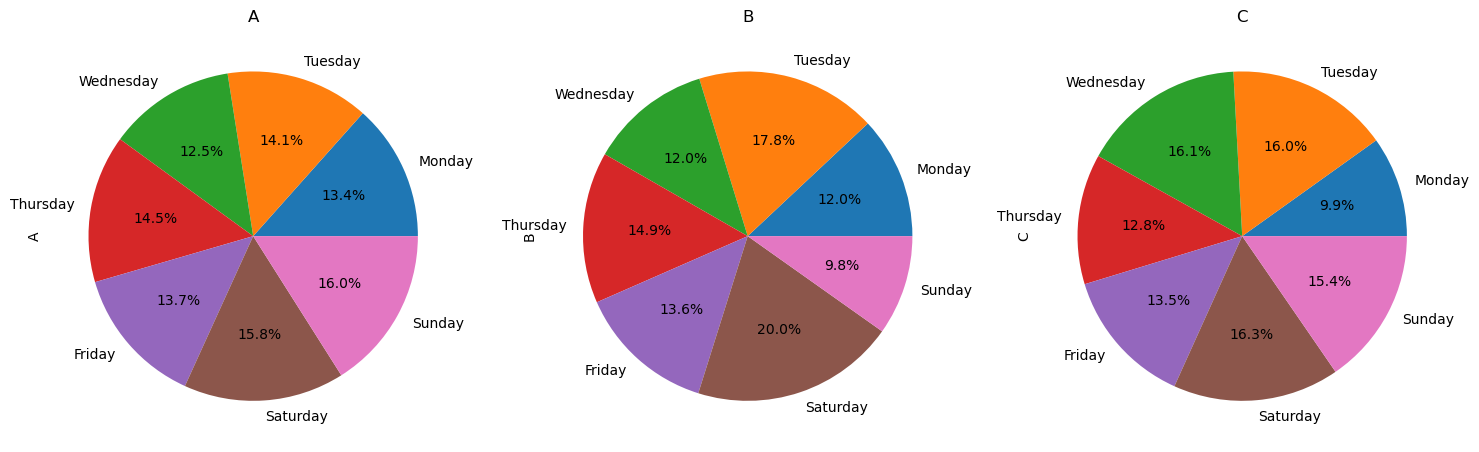

In [198]:
# Plot pie charts in a single line
fig, axes = plt.subplots(1, len(dbr_day.columns), figsize=(15, 5))
axes
for i, branch in enumerate(dbr_day.columns):
    #axes[i].pie(dbr_pr[branch], labels=dbr_pr.index, autopct='%1.1f%%', startangle=90)
    dbr_day[branch].plot.pie(ax=axes[i], subplots= True,autopct='%1.1f%%', startangle=0)
    axes[i].set_title(f'{branch}')
plt.tight_layout()
plt.show()

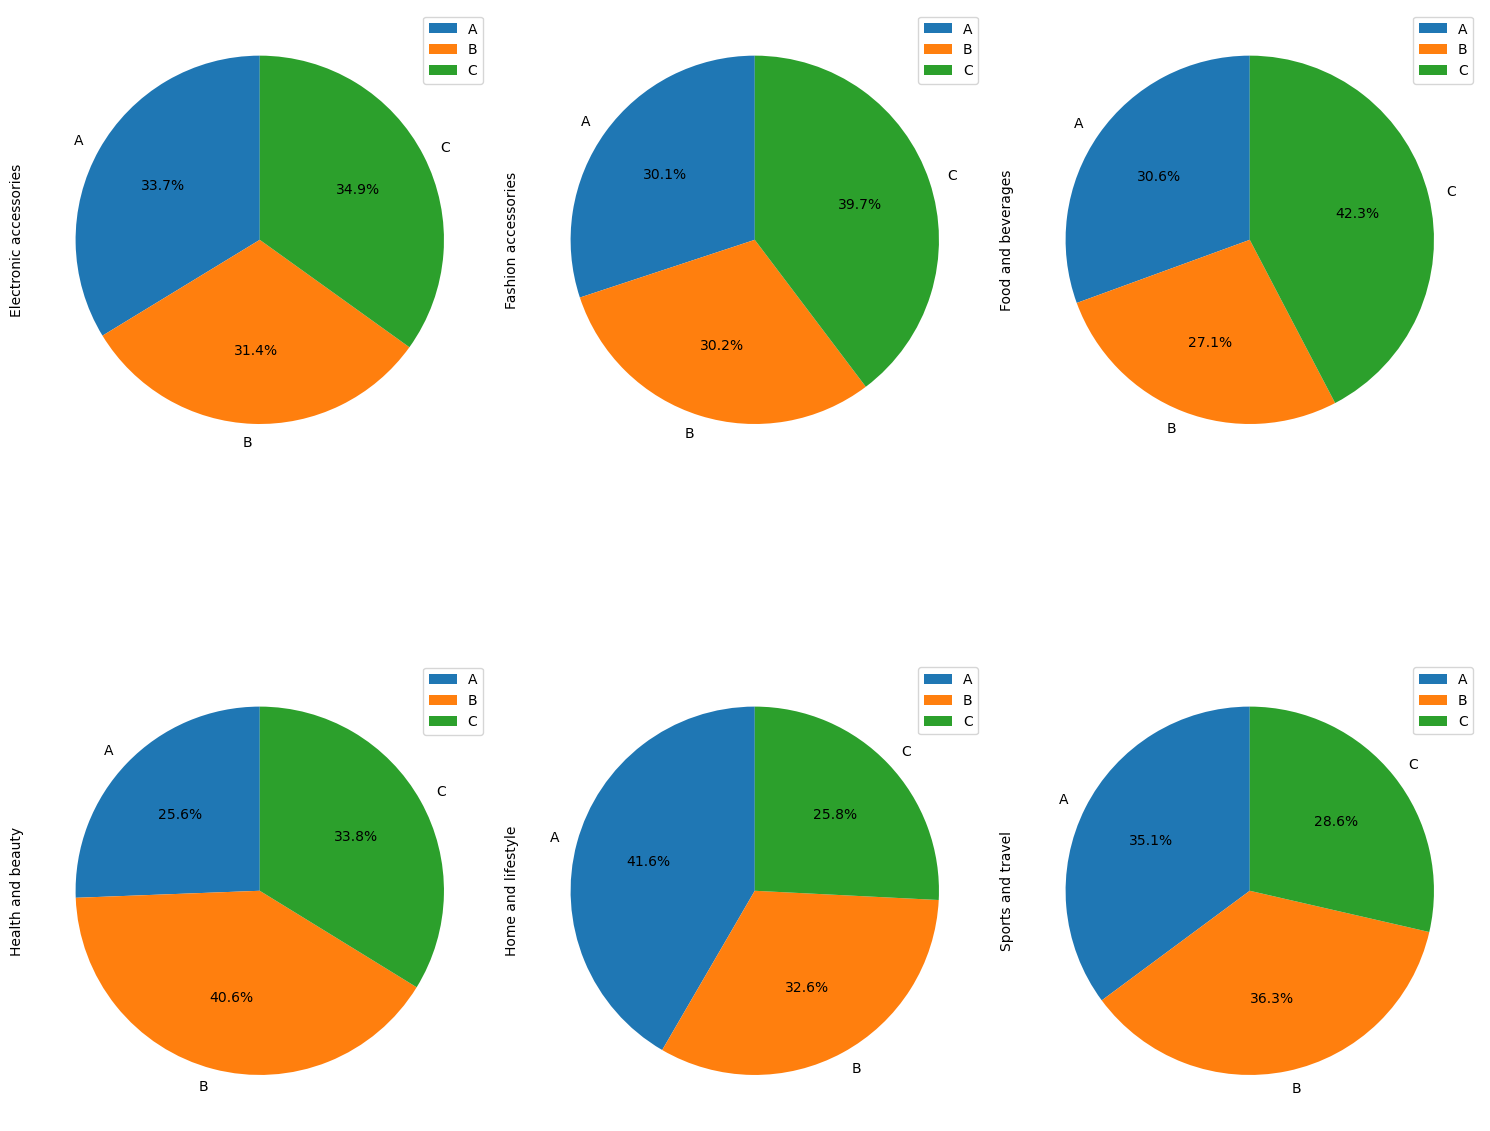

In [199]:
dbr_pr=df.groupby(['Product line','Branch'])['Total'].sum().unstack().T
ncols=3
fig, axes = plt.subplots(nrows=len(dbr_pr.columns)//ncols, ncols=ncols,figsize=(15, 15))
plt.xticks(rotation = 90);
dbr_pr.plot.pie(ax=axes, subplots= True,autopct='%1.1f%%',startangle=90)
plt.tight_layout()
plt.show()

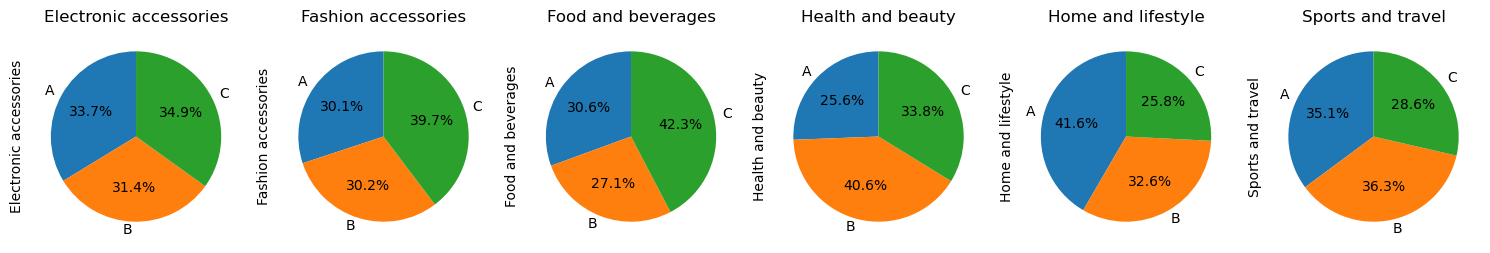

In [200]:

# Plot pie charts in a single line
fig, axes = plt.subplots(1, len(dbr_pr.columns), figsize=(15, 5))
axes
for i, product_line in enumerate(dbr_pr.columns):
    #axes[i].pie(dbr_pr[product_line], labels=dbr_pr.index, autopct='%1.1f%%', startangle=90)
    dbr_pr[product_line].plot.pie(ax=axes[i], subplots= True,autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{product_line}')
plt.tight_layout()
plt.show()

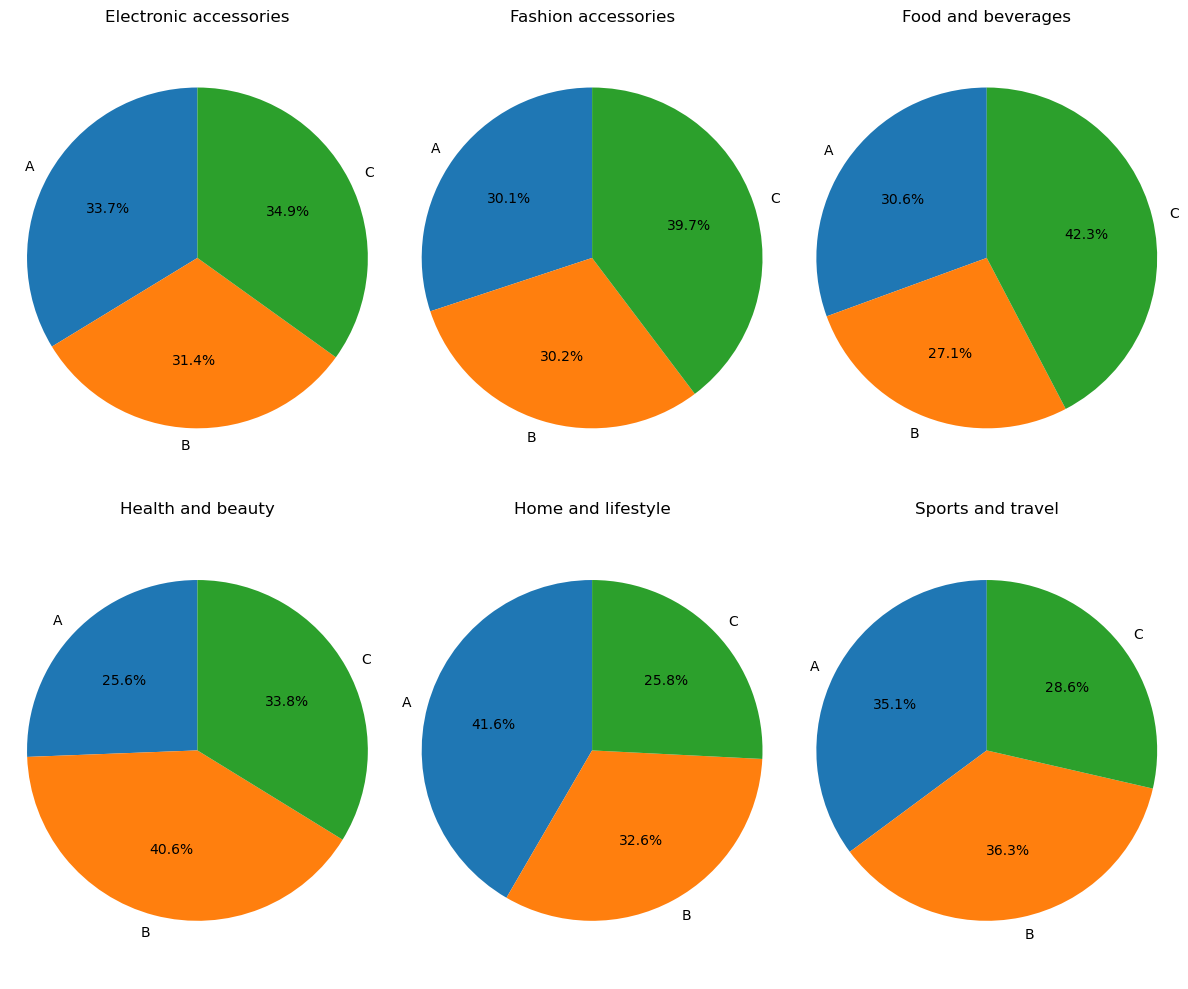

In [201]:
dbr_pr = df.groupby(['Branch', 'Product line'])['Total'].sum().unstack()
dbr_pr
ncols=3
fig, axes = plt.subplots(nrows=len(dbr_pr.columns)//ncols, ncols=ncols,figsize=(12, 10))

for i, product_line in enumerate(dbr_pr.columns):
    axes[i//ncols,i%ncols].pie(dbr_pr[product_line], labels=dbr_pr.index, autopct='%1.1f%%', startangle=90)
    axes[i//ncols,i%ncols].set_title(f'{product_line}')
    axes[i//ncols,i%ncols].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

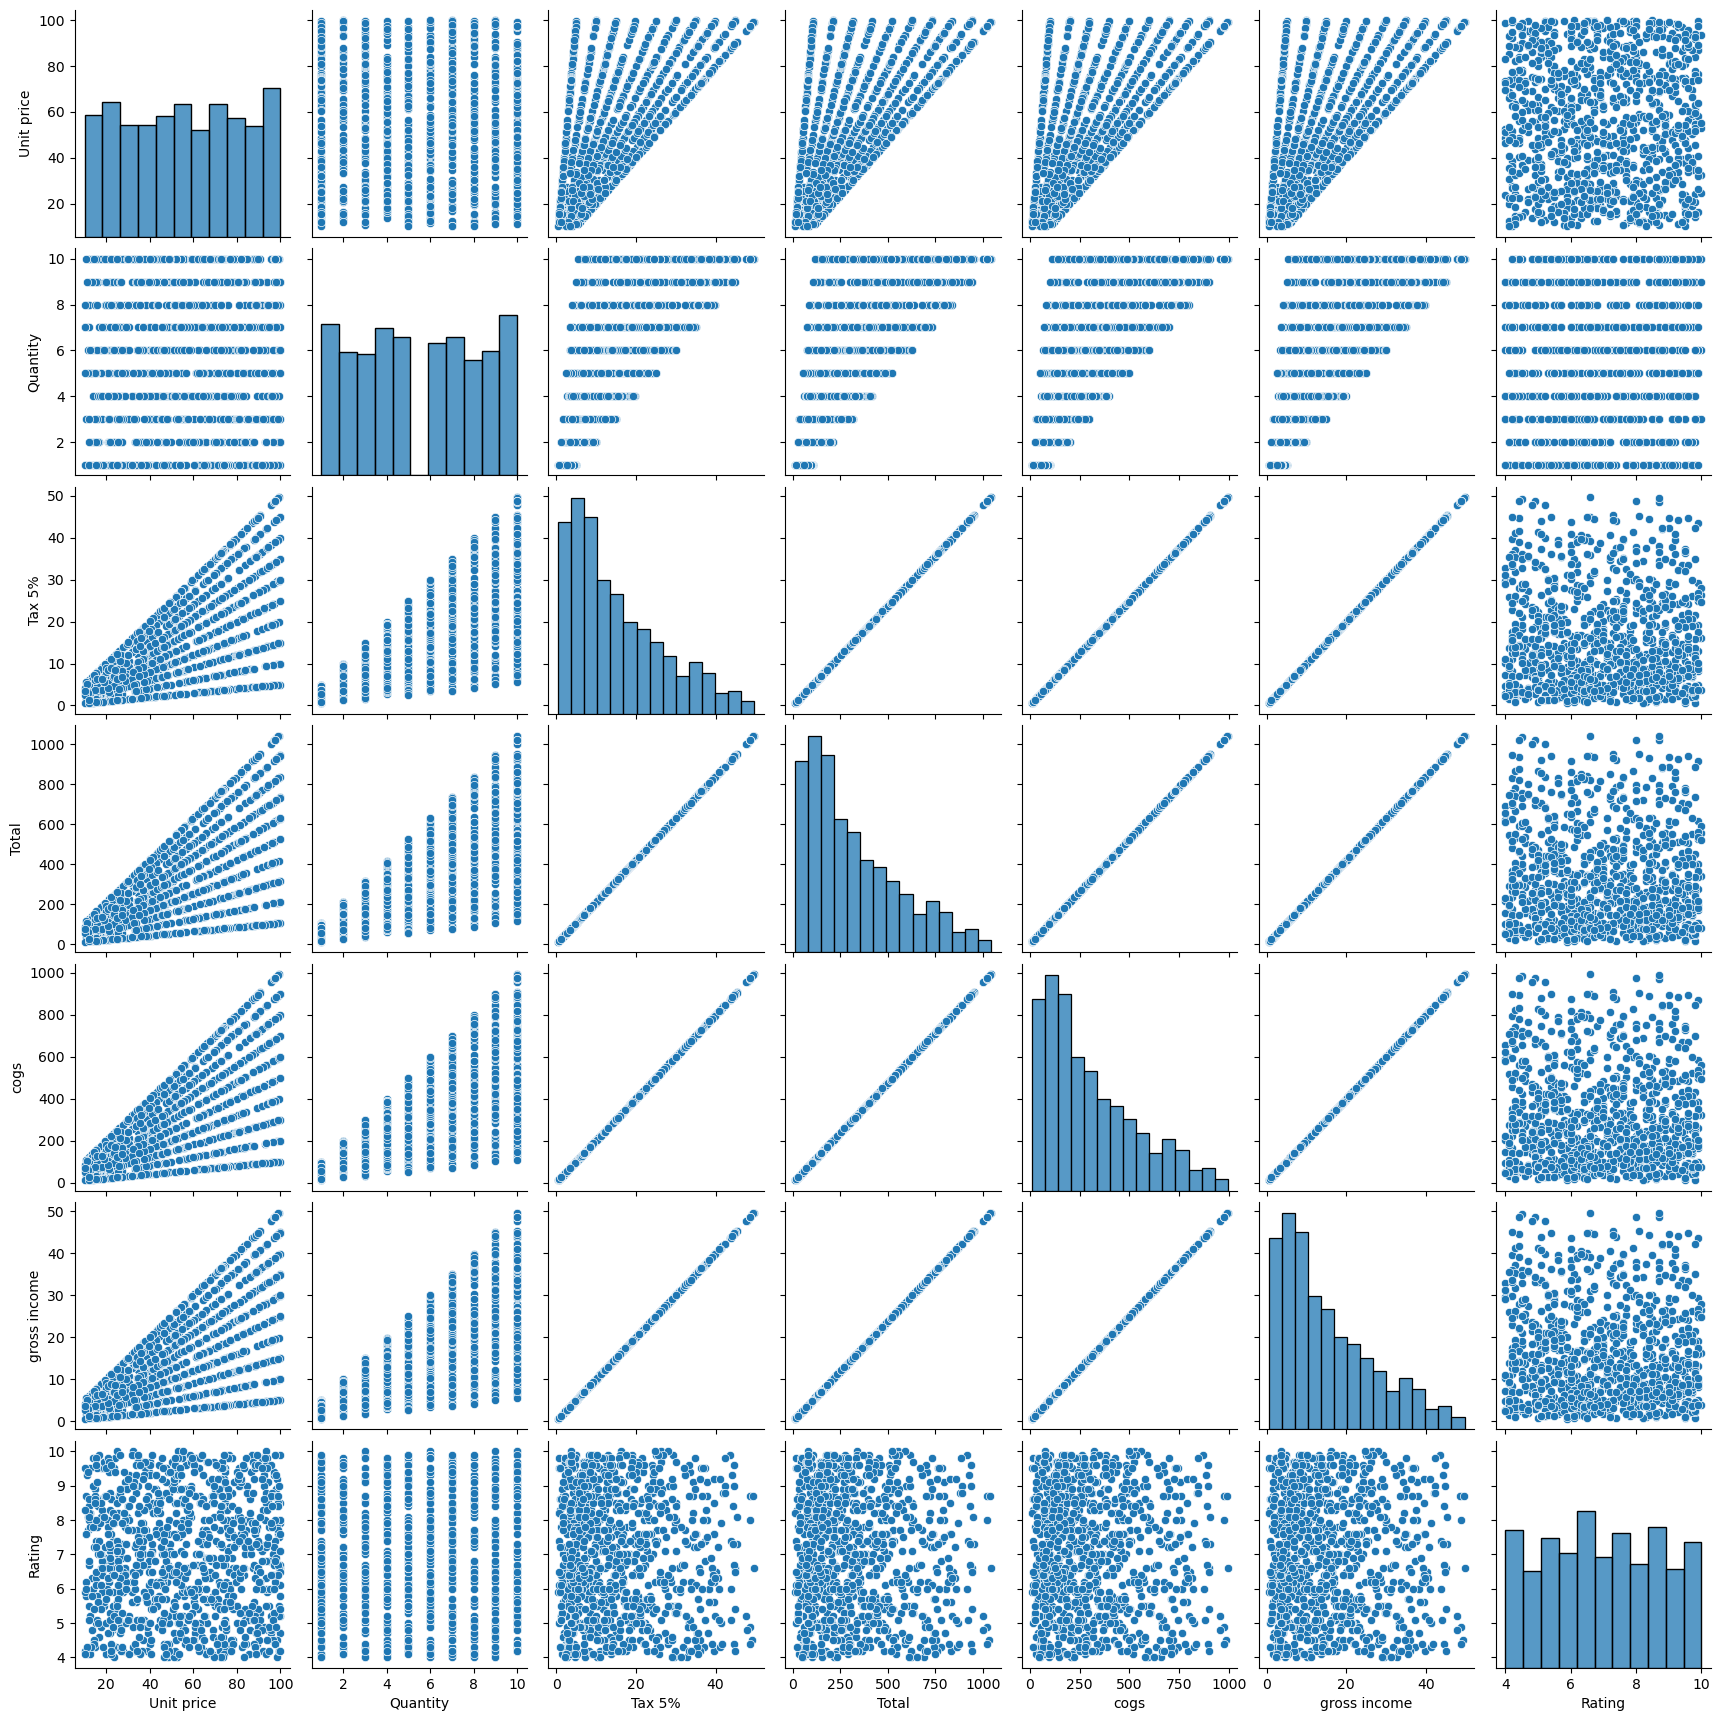

In [202]:
sns.pairplot(df);

d:\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


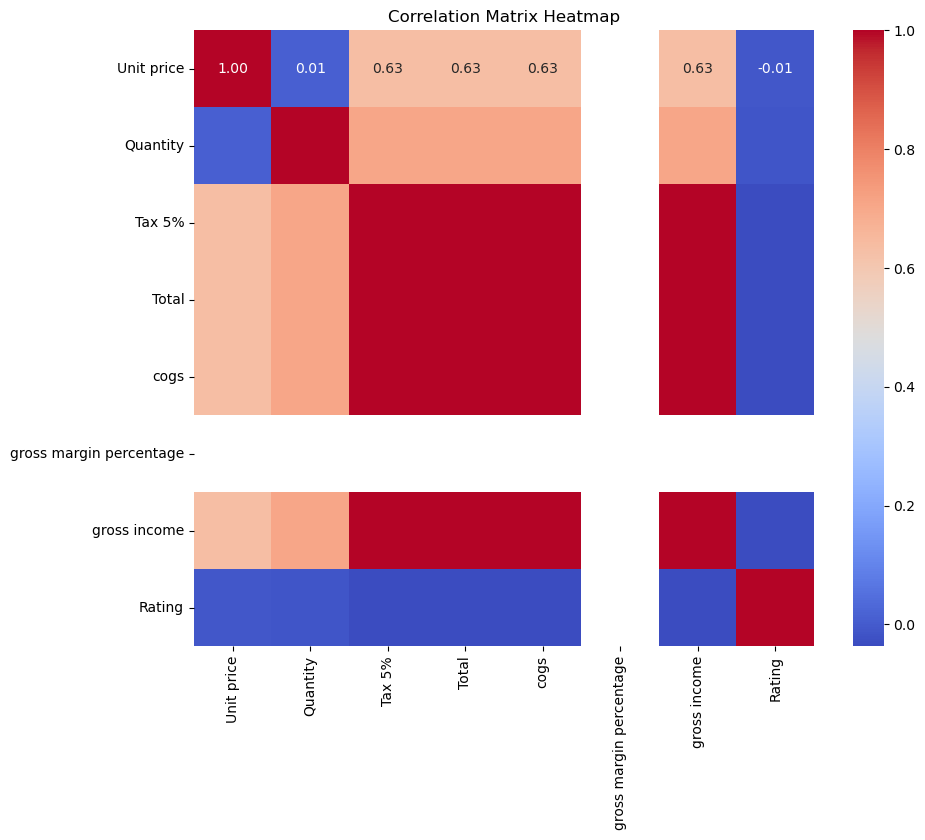

In [ ]:
df = df.select_dtypes(include=['number'])


# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [205]:
df.drop(['Tax 5%','cogs','gross income','Date'], axis =1,inplace=True)

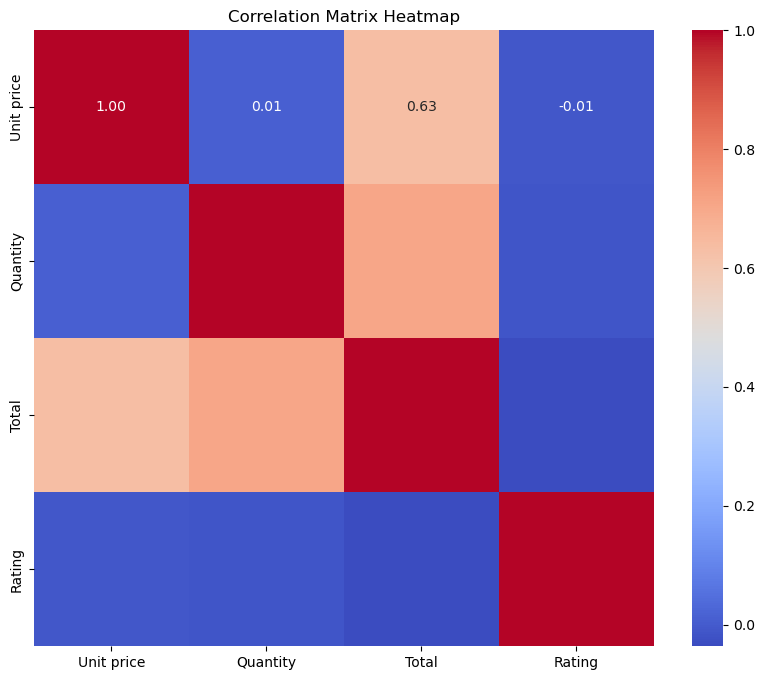

In [211]:
df = df.select_dtypes(include=['number'])


# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

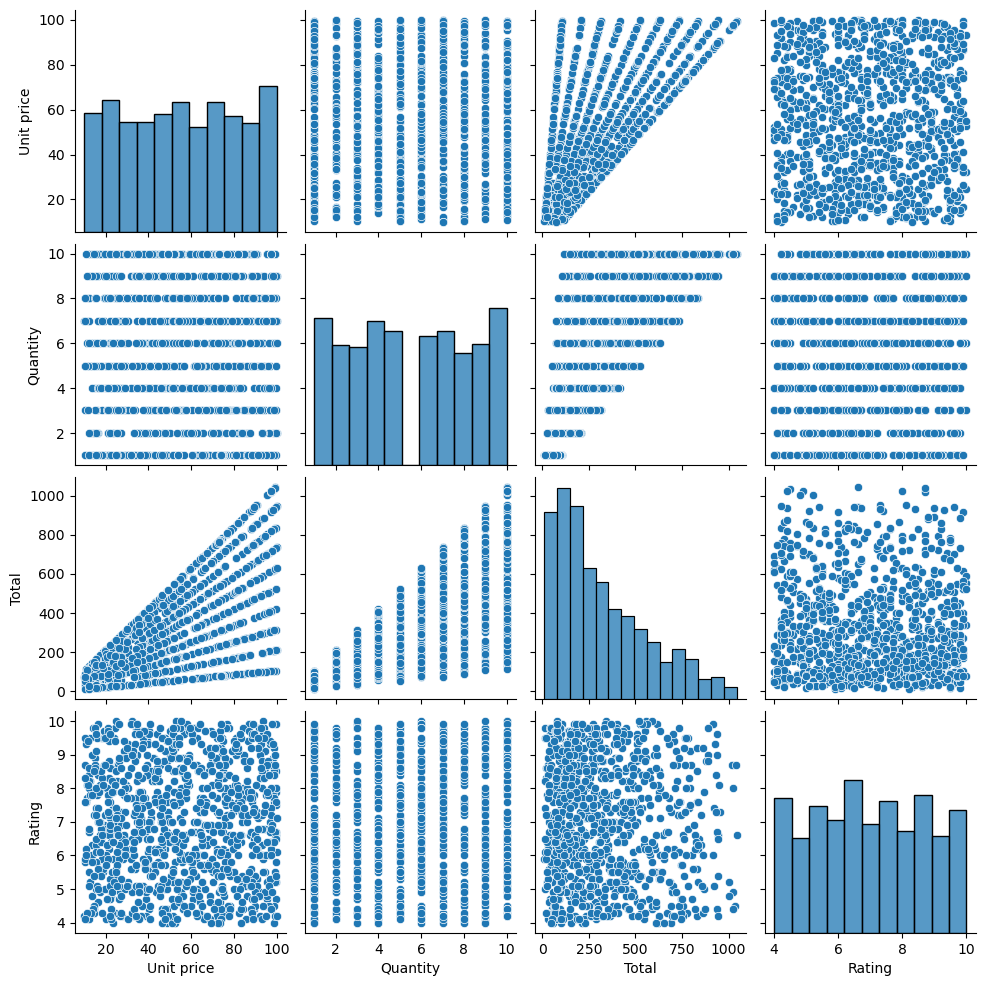

In [212]:
sns.pairplot(df);

In [219]:
df.head(1)

,Unit price,Quantity,Total,Rating
0,68.84,6,433.692,5.8


In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector

In [243]:
df = pd.read_csv("data\supermarket_sales - Sheet1.csv")
df['Date'] = pd.to_datetime(df['Date'])   # Converts date column into Datetime datatype
df.drop(["Invoice ID","Time"], axis=1, inplace=True)
df.drop(["gross margin percentage"], axis =1, inplace= True)
df.drop('City',axis=1,inplace=True)   # Because each City has a single branch
df["Day of week"]=df['Date'].dt.strftime('%A')
df.drop(['Tax 5%','cogs','gross income','Date'], axis =1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.head(1)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,Rating,Day of week
0,A,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,9.1,Saturday


In [245]:
# Perform one-hot encoding for categorical variables
df1 = pd.get_dummies(df, columns=['Branch', 'Customer type', 'Gender', 'Product line', 'Day of week', 'Payment'])

# Split data into features (X) and target variable (y)
X = df1.drop(columns=['Total'])
y = df1['Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [246]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("model score on test data:",model.score(X_test, y_pred))
print(model.coef_)
print(model.intercept_)
y_pred = model.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.3f" % r2_score(y, y_pred))
print("model score on total data:",model.score(X,y_pred))

Mean Squared Error: 6373.873309342774
model score on test data: 1.0
[ 5.81552655 58.12542334 -2.95820335  0.31004424 -5.35066412  5.04061989
 -1.95269215  1.95269215  2.58842622 -2.58842622 -1.57435037  0.3418268
  3.86995647 -5.13632302  5.98476625 -3.48587613 -5.52790662 -3.6725474
 10.049544   -2.25160468 -1.89732715 12.63329991 -9.33345806 -2.72851954
  7.14722036 -4.41870082]
-302.35338761181055
Mean squared error: 6547.64
Coefficient of determination: 0.892
model score on total data: 1.0


In [253]:
# Define function to make predictions based on input features
def predict_total(Branch, Customer_type, Gender, Product_line, Unit_price, Quantity, Payment, Rating, Day_of_week):
    # Convert input features into a DataFrame
    input_data = pd.DataFrame({
        'Branch': [Branch],
        'Customer type': [Customer_type],
        'Gender': [Gender],
        'Product line': [Product_line],
        'Payment': [Payment],
        'Day of week': [Day_of_week],
        'Unit price': [Unit_price],
        'Quantity': [Quantity],
        'Rating': [Rating]
    })
    
    # Perform one-hot encoding to align feature names with training data
    input_data_encoded = pd.get_dummies(input_data)
    
    # Align feature names with training data
    missing_cols = set(X_train.columns) - set(input_data_encoded.columns)
    for col in missing_cols:
        input_data_encoded[col] = 0
    
    # Reorder columns to match training data
    input_data_encoded = input_data_encoded[X_train.columns]
    
    # Make prediction
    total_prediction = model.predict(input_data_encoded)
    
    return total_prediction[0]

# Create interactive interface
interact(
    predict_total,
    Branch=Dropdown(options=branch_options),
    Customer_type=Dropdown(options=customer_type_options),
    Gender=Dropdown(options=gender_options),
    Product_line=Dropdown(options=product_line_options),
    Unit_price=FloatSlider(min=unit_price_min, max=unit_price_max, value=unit_price_mean),
    Quantity=IntSlider(min=quantity_min, max=quantity_max, value=quantity_mean),
    Payment=Dropdown(options=payment_options),
    Rating=FloatSlider(min=rating_min, max=rating_max, value=rating_mean),
    Day_of_week=Dropdown(options=day_of_week_options)
);


interactive(children=(Dropdown(description='Branch', options=('A', 'B', 'C'), value='A'), Dropdown(description…

In [ ]:
#compute correlation matrix
X.corr()

In [ ]:
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())


In [251]:
ols_reg = LinearRegression()
sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_to_select=5)
sfs.fit(X, y)
print(sfs.get_feature_names_out())

['Unit price' 'Quantity' 'Rating' 'Day of week_Wednesday'
 'Payment_Credit card']


In [252]:
ols_reg = LinearRegression()
sfs = SequentialFeatureSelector(ols_reg, direction='backward',n_features_to_select=5)
sfs.fit(X, y)
print(sfs.get_feature_names_out())

['Unit price' 'Quantity' 'Rating' 'Day of week_Wednesday'
 'Payment_Credit card']


In [254]:
# Define function to make predictions based on input features
def predict_total(Unit_price, Quantity,Rating ,Day_of_week,Payment):
    # Convert input features into a DataFrame
    input_data = pd.DataFrame({
        'Payment': [Payment],
        'Day of week': [Day_of_week],
        'Unit price': [Unit_price],
        'Quantity': [Quantity],
        'Rating': [Rating]
    })
    
    # Perform one-hot encoding to align feature names with training data
    input_data_encoded = pd.get_dummies(input_data)
    
    # Align feature names with training data
    missing_cols = set(X_train.columns) - set(input_data_encoded.columns)
    for col in missing_cols:
        input_data_encoded[col] = 0
    
    # Reorder columns to match training data
    input_data_encoded = input_data_encoded[X_train.columns]
    
    # Make prediction
    total_prediction = model.predict(input_data_encoded)
    
    return total_prediction[0]

# Create interactive interface
interact(
    predict_total,
    Unit_price=FloatSlider(min=unit_price_min, max=unit_price_max, value=unit_price_mean),
    Quantity=IntSlider(min=quantity_min, max=quantity_max, value=quantity_mean),
    Payment=Dropdown(options=payment_options),
    Rating=FloatSlider(min=rating_min, max=rating_max, value=rating_mean),
    Day_of_week=Dropdown(options=day_of_week_options)
);


interactive(children=(FloatSlider(value=55.67213, description='Unit_price', max=99.96, min=10.08), IntSlider(v…